<div style='background-image: url("https://www.geophysik.uni-muenchen.de/ROMY/theme/images/ringlaser_wideformat.jpg") ; padding: 0px ; background-size: cover ; border-radius: 15px ; height: 250px; background-position: 0% 80%'>
    <div style="float: left ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 39% ; height: 150px">
        <div style="position: relative ; top: 50%;  transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%"> <br>ROMY - <br><br> Systematic Analysis <br> of Noise </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.7)"></div>
        </div>
    </div>

## Importing

### Official Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import time 
import obspy

from scipy.signal import resample, hilbert, correlate
from tqdm import tqdm

### Own Processing Methods

In [2]:
import sys
sys.path.insert(0, 'submodules')

In [3]:
from EchoPerformance import __echo_performance
from CreateSyntheticEventV2 import __create_synthetic_event_v2
from MinimizeResidual import __minimize_residual
from CreateLinearChirp import __create_linear_chirp
from Tapering import __tapering
from InstaFreqHilbert import __insta_freq_hilbert
from LoadMseed import __load_mseed
from Modulation import __modulation 
from RunSagnacProcessing import __run_sagnac_processing 


In [4]:
# def __modulation(time_modeltrace, modeltrace, T, sps, mod_index):

#     timeline = time_modeltrace

#     Npts = int(T*sps)

#     # tt = np.arange(0, T, 1/sps/fraction)
#     tt = time_modeltrace

# #     modulation_index = abs(f_upper-sgnc)/f_upper
# #     print(modulation_index)
    
#     fm = sgnc + mod_index * modeltrace




#     print(' Integrating ... ')
#     t1 = time.time()

#     ifm = np.zeros(Npts+1)
#     summe = 0

#     for i in range(0, Npts+1):
#         summe += fm[i]
#         ifm[i] = 2*np.pi*summe

#     ifm = ifm / sps # to finish integral

#     t2 = time.time()

#     __echo_performance(t1, t2)



#     synthetic_signal = np.sin( 2 * np.pi * ifm )
#     # synthetic_signal = np.cos( 2 * np.pi * ifm )

#     # synthetic_signal = np.cos(2*np.pi * (sgnc + 0.01 * ifm ))

#     # synthetic_signal = 1.0 * np.sin(2*np.pi*sgnc * timeline - 0.001 * np.cos(modeltrace*timeline))

#     return timeline, synthetic_signal

### Own Plotting Methods

In [5]:
from MakeplotTraceAndSpectrum import __makeplot_trace_and_spectrum
from MakeplotTraceAndPSD import __makeplot_trace_and_psd
from MakeplotModulatedSignal import __makeplot_modulated_signal
from MakeplotDemodulationQuality import __makeplot_demodulation_quality
from Normalize import __normalize

## Configuration

In [16]:
div = 10
oversampling = 10

T = 1600.0/div
sps = 5000

f_lower, f_upper = 0.01, 10.0

sgnc = 550

taper_type="window"

modulation_index = 0.1
 
syn_signal = 'chirp'  ## 'chirp' or 'synthetic_trace' or 'real_trace'

noises = [0.001, 0.01, 0.1, 1, 10, 100]
noises = np.logspace(-2,2,30)
print(noises)

[  1.00000000e-02   1.37382380e-02   1.88739182e-02   2.59294380e-02
   3.56224789e-02   4.89390092e-02   6.72335754e-02   9.23670857e-02
   1.26896100e-01   1.74332882e-01   2.39502662e-01   3.29034456e-01
   4.52035366e-01   6.21016942e-01   8.53167852e-01   1.17210230e+00
   1.61026203e+00   2.21221629e+00   3.03919538e+00   4.17531894e+00
   5.73615251e+00   7.88046282e+00   1.08263673e+01   1.48735211e+01
   2.04335972e+01   2.80721620e+01   3.85662042e+01   5.29831691e+01
   7.27895384e+01   1.00000000e+02]


## Test Noise Content

yes 0.01


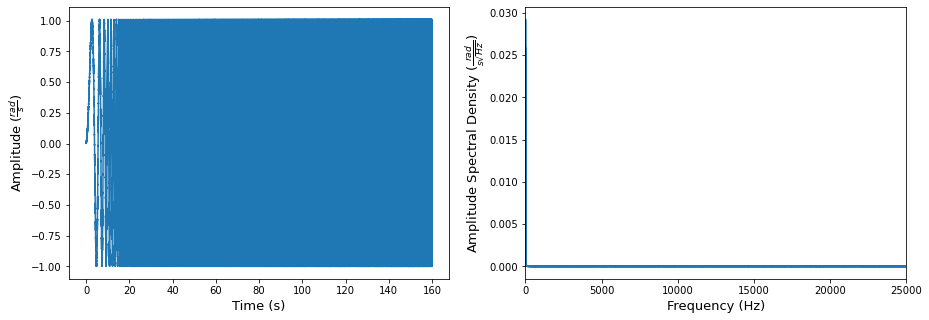


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.38 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1552092.624 at lag: 0

optimized: original -  1.219 * model + 0.026

cutoff: 8000 --> residual median: 0.0016710909654685802

optimized: original -  1.219 * model + 0.026

1.01562300316


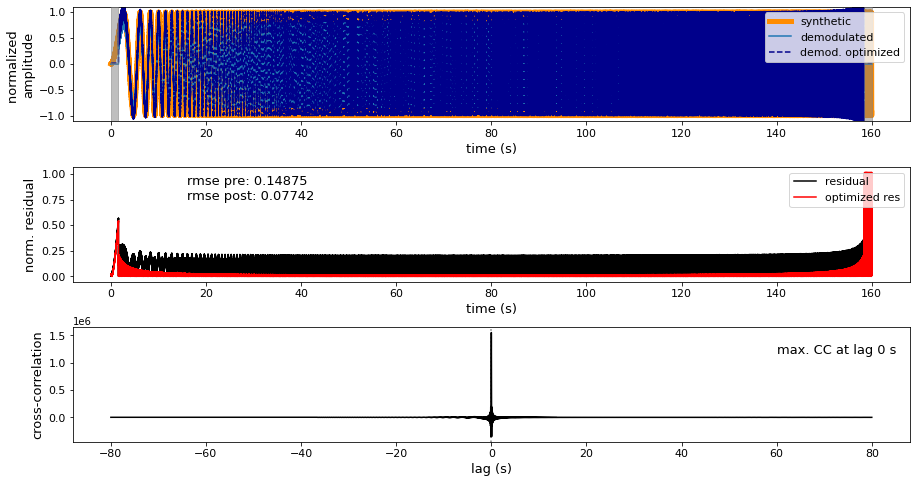

DONE
_______________________________
yes 0.0137382379588


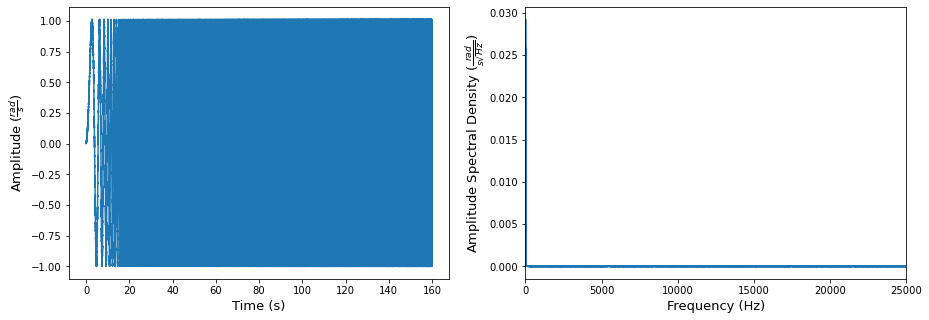


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.33 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1552038.913 at lag: 0

optimized: original -  1.261 * model + 0.027

cutoff: 8000 --> residual median: 0.0016542966257996339

optimized: original -  1.261 * model + 0.027

1.01291825655


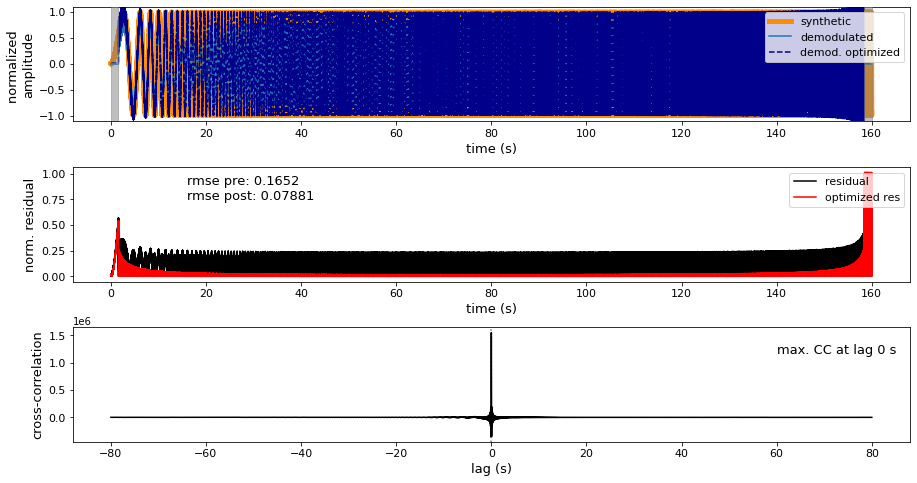

DONE
_______________________________
yes 0.0188739182214


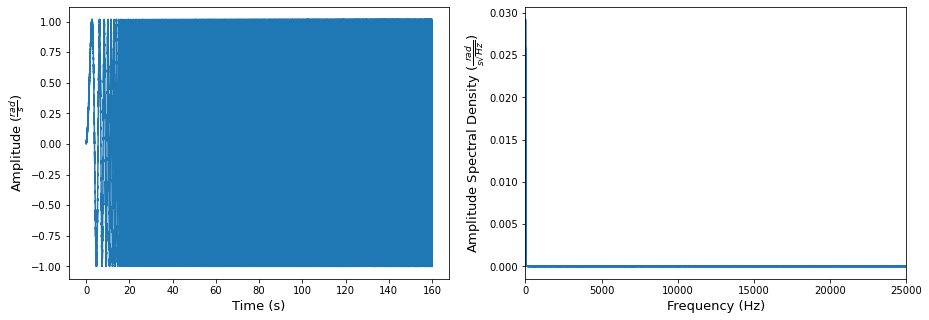


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.32 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1551999.407 at lag: 0

optimized: original -  1.321 * model + 0.029

cutoff: 8000 --> residual median: 0.001626959365405689

optimized: original -  1.321 * model + 0.029

1.00944393474


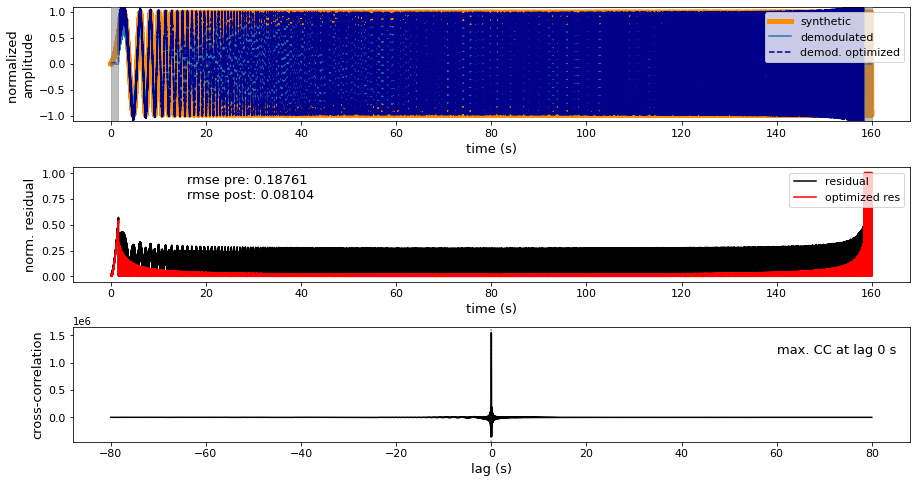

DONE
_______________________________
yes 0.025929437974


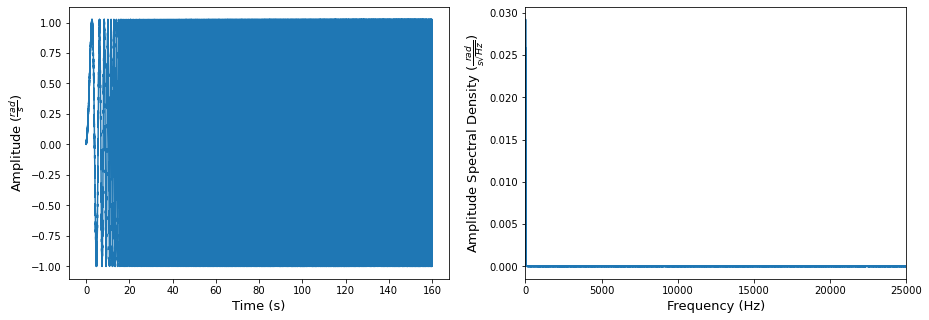


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.52 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1551933.543 at lag: 0

optimized: original -  1.398 * model + 0.031

cutoff: 8000 --> residual median: 0.0016468619560657816

optimized: original -  1.398 * model + 0.031

1.00525687473


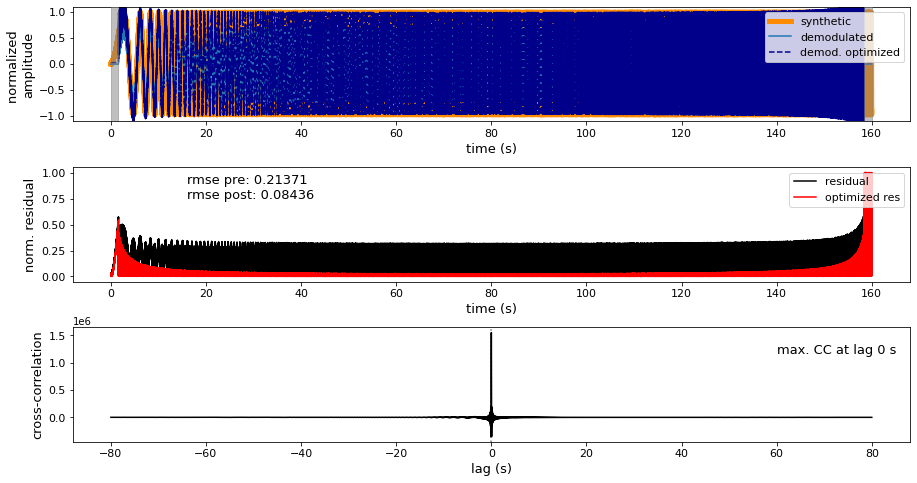

DONE
_______________________________
yes 0.0356224789026


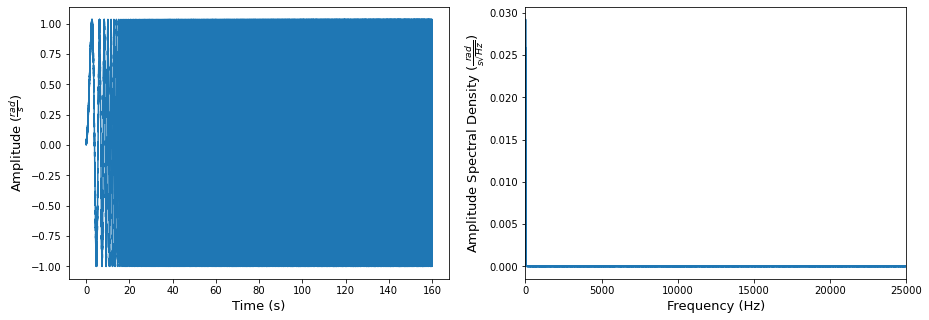


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.4 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1551871.306 at lag: 0

optimized: original -  1.474 * model + 0.034

cutoff: 8000 --> residual median: 0.0016282771386186834

optimized: original -  1.474 * model + 0.034

0.999631469434


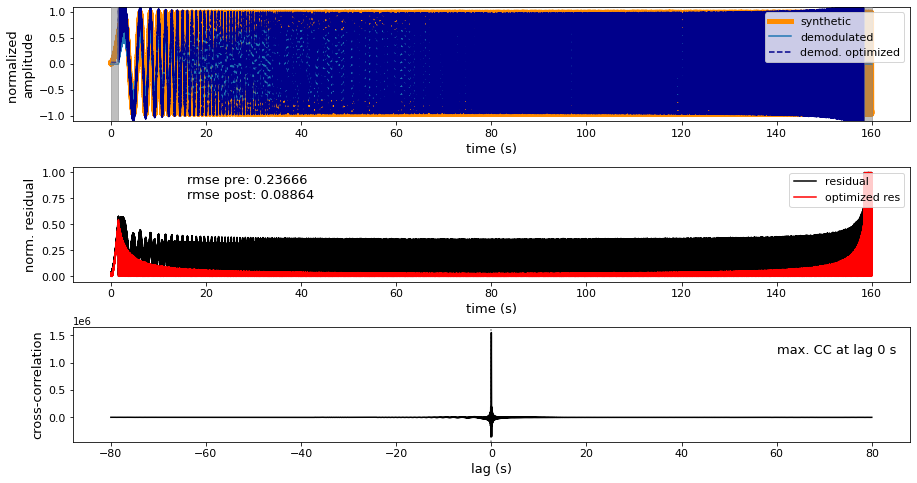

DONE
_______________________________
yes 0.0489390091848


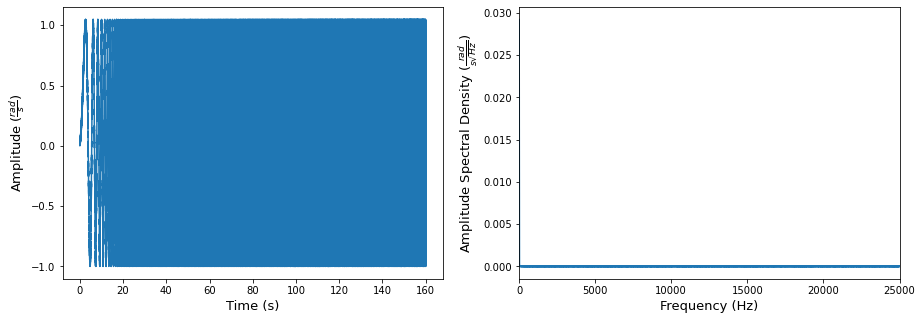


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.14 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1551719.933 at lag: 0

optimized: original -  1.533 * model + 0.04

cutoff: 8000 --> residual median: 0.001569359792958136

optimized: original -  1.533 * model + 0.04

0.992491670758


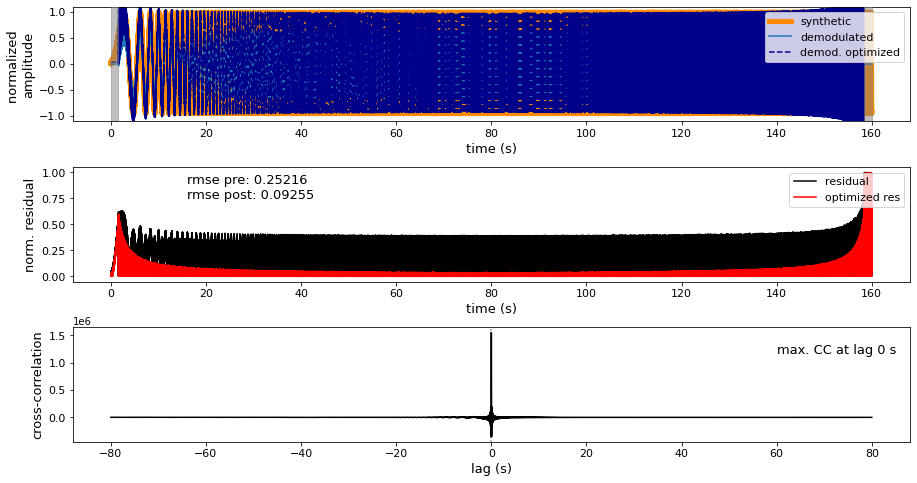

DONE
_______________________________
yes 0.067233575365


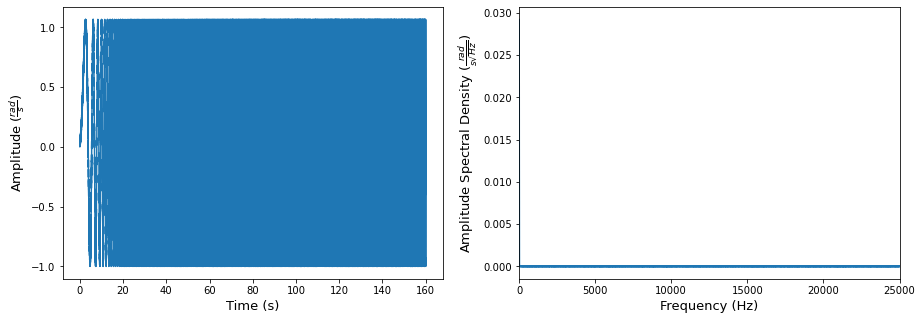


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.44 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1551600.721 at lag: 0

optimized: original -  1.513 * model + 0.047

cutoff: 8000 --> residual median: 0.0014670168245758397

optimized: original -  1.513 * model + 0.047

0.982478892693


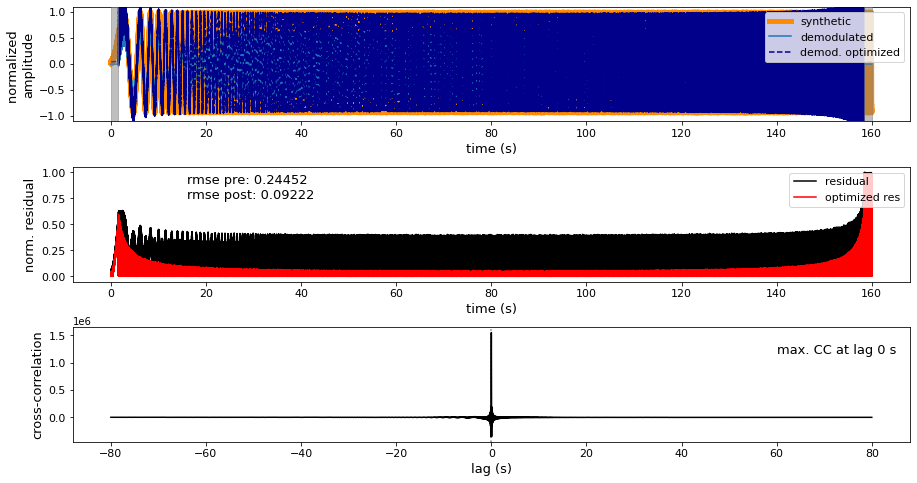

DONE
_______________________________
yes 0.0923670857187


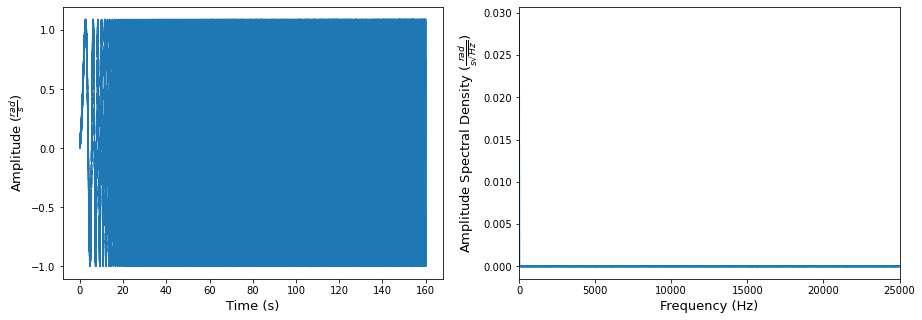


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.45 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1550974.4 at lag: 0

optimized: original -  1.307 * model + 0.059

cutoff: 8000 --> residual median: 0.001335345921510911

optimized: original -  1.307 * model + 0.059

0.974248040039


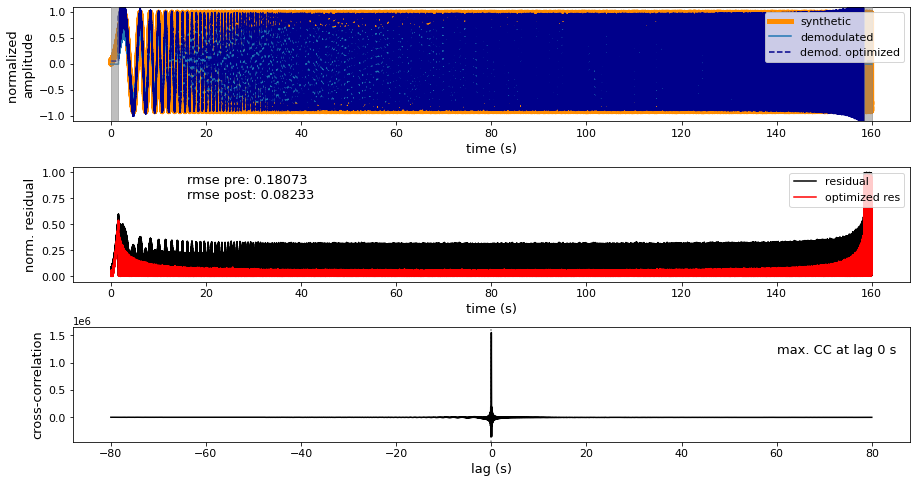

DONE
_______________________________
yes 0.126896100317


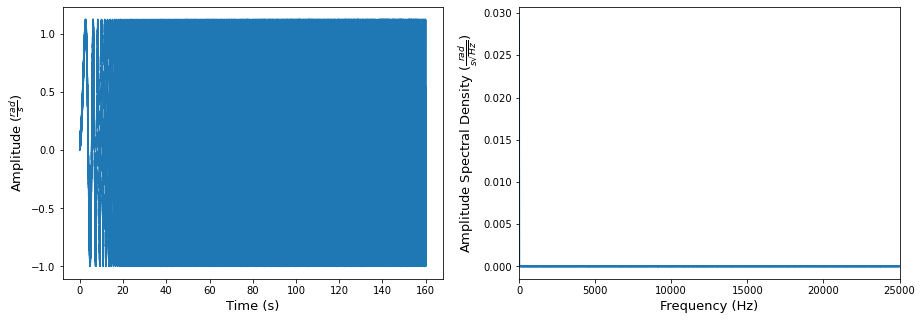


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.28 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1549546.76 at lag: 0

optimized: original -  0.99 * model + 0.078

cutoff: 8000 --> residual median: 0.0010751893004707913

optimized: original -  0.99 * model + 0.078

0.964266431076


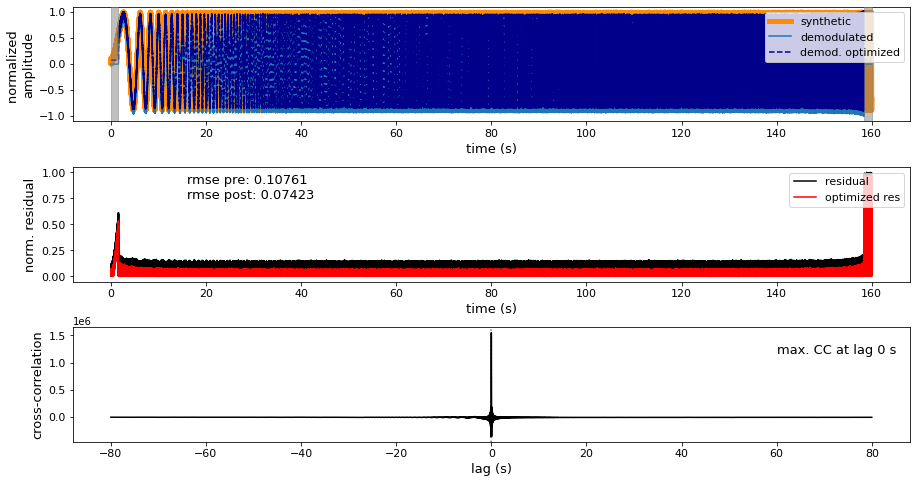

DONE
_______________________________
yes 0.17433288222


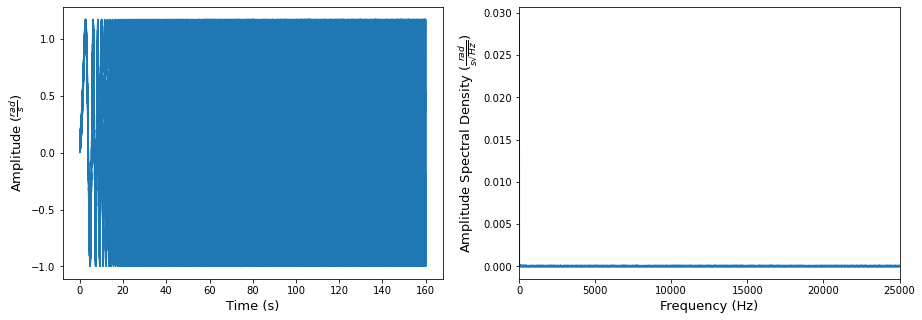


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.29 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1550223.583 at lag: 0

optimized: original -  1.372 * model + 0.089

cutoff: 8000 --> residual median: 0.0012323071334293667

optimized: original -  1.372 * model + 0.089

0.939118116157


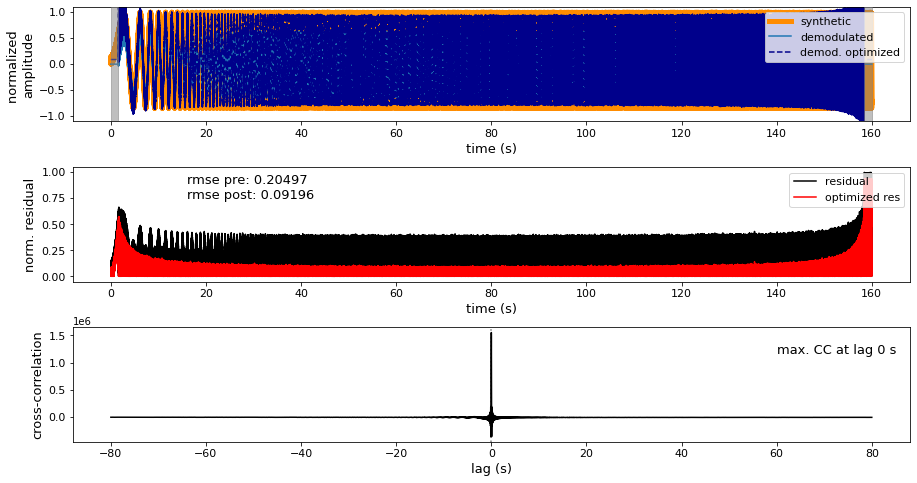

DONE
_______________________________
yes 0.239502661999


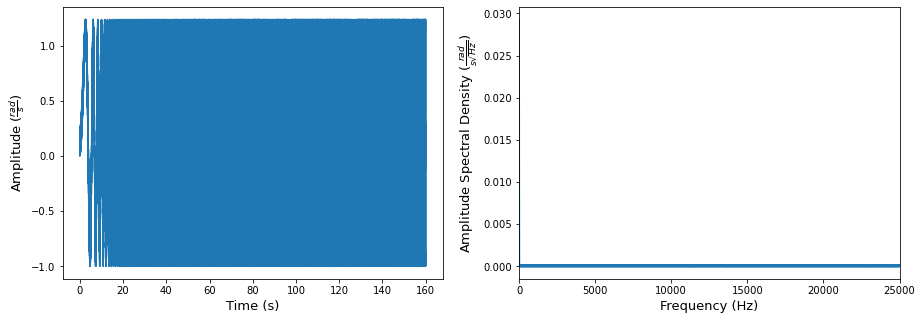


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.41 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1547892.201 at lag: 0

optimized: original -  0.921 * model + 0.115

cutoff: 8000 --> residual median: 0.0008394829104858559

optimized: original -  0.921 * model + 0.115

0.920669973967


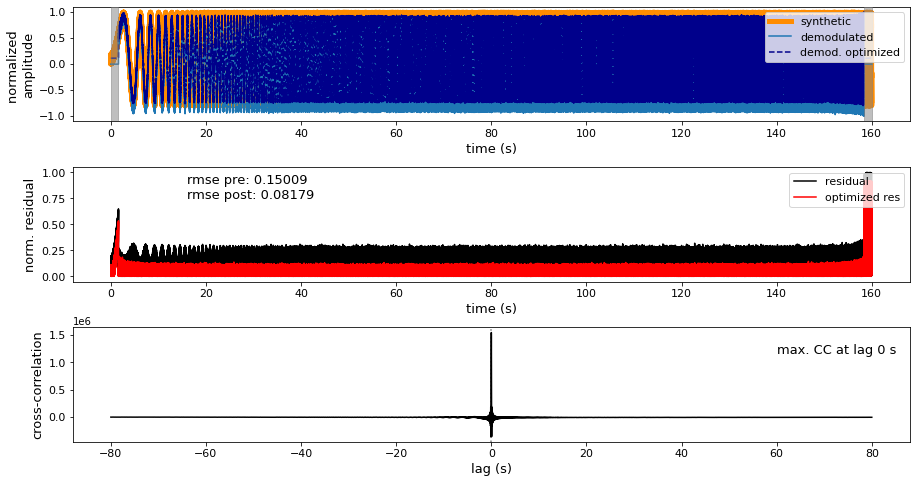

DONE
_______________________________
yes 0.329034456231


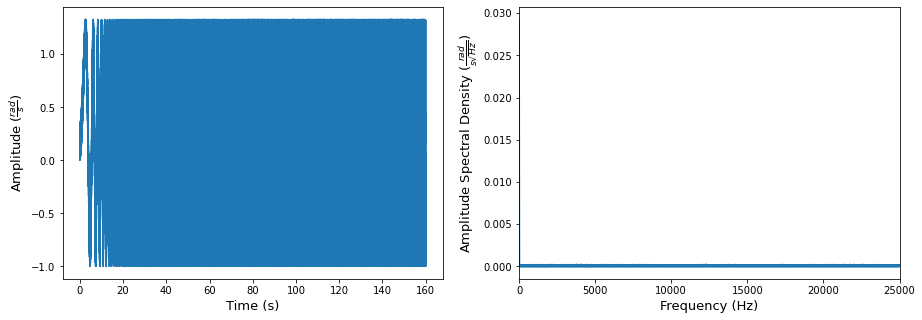


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.47 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1548970.803 at lag: 0

optimized: original -  1.165 * model + 0.137

cutoff: 8000 --> residual median: 0.000653940741577208

optimized: original -  1.165 * model + 0.137

0.885900627719


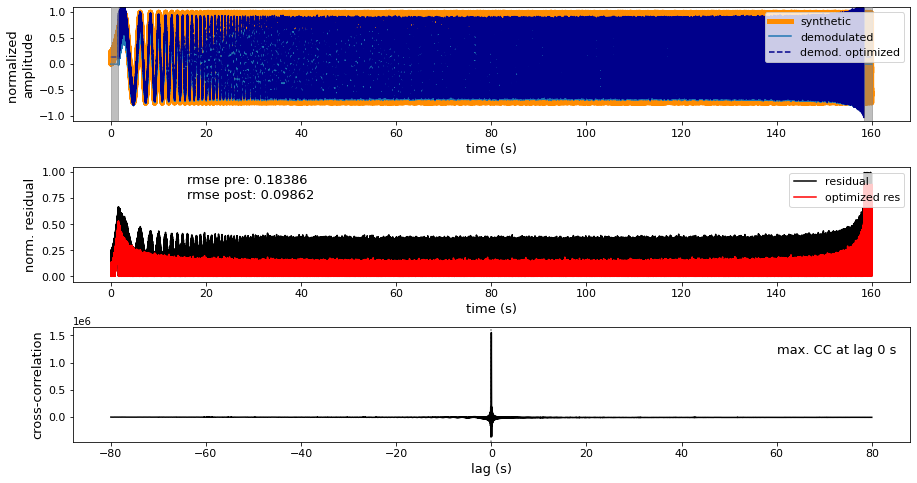

DONE
_______________________________
yes 0.452035365636


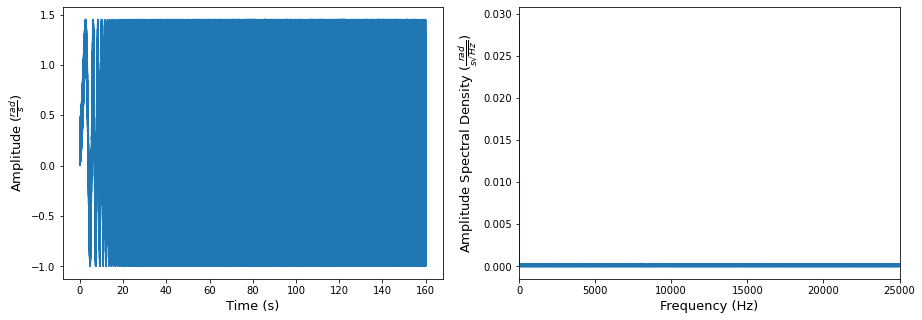


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.41 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1548420.846 at lag: 0

optimized: original -  1.086 * model + 0.167

cutoff: 8000 --> residual median: 0.0005478828891780606

optimized: original -  1.086 * model + 0.167

0.854978040415


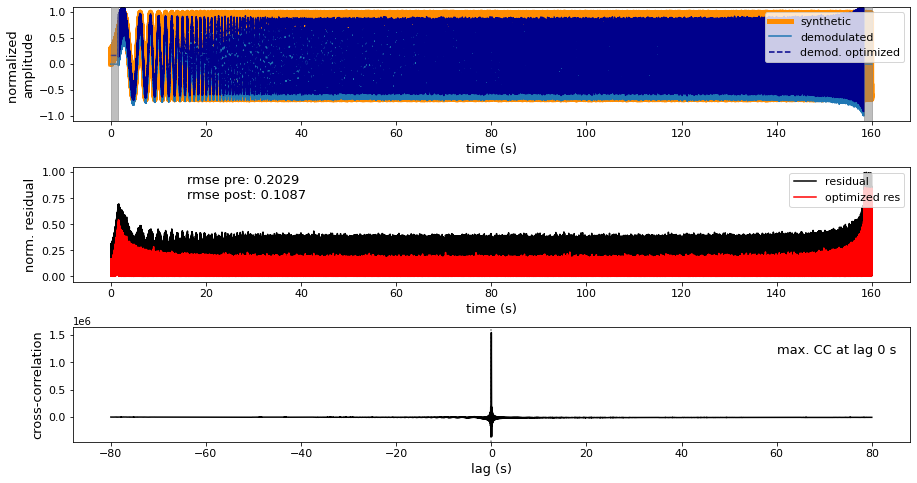

DONE
_______________________________
yes 0.621016941892


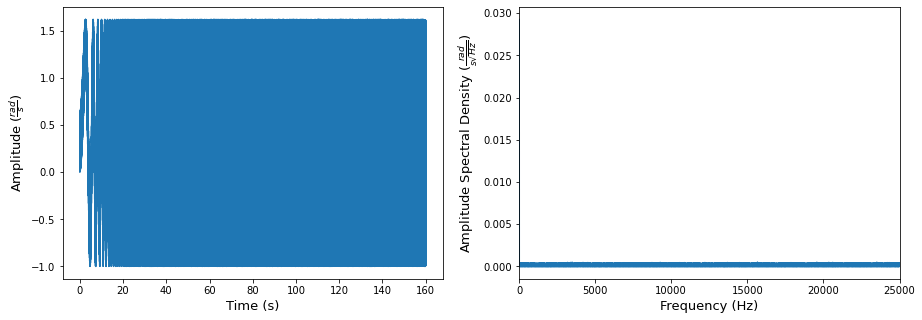


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.44 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1540801.482 at lag: 0

optimized: original -  0.723 * model + 0.208

cutoff: 8000 --> residual median: 0.0002690912701309722

optimized: original -  0.723 * model + 0.208

0.819428601854


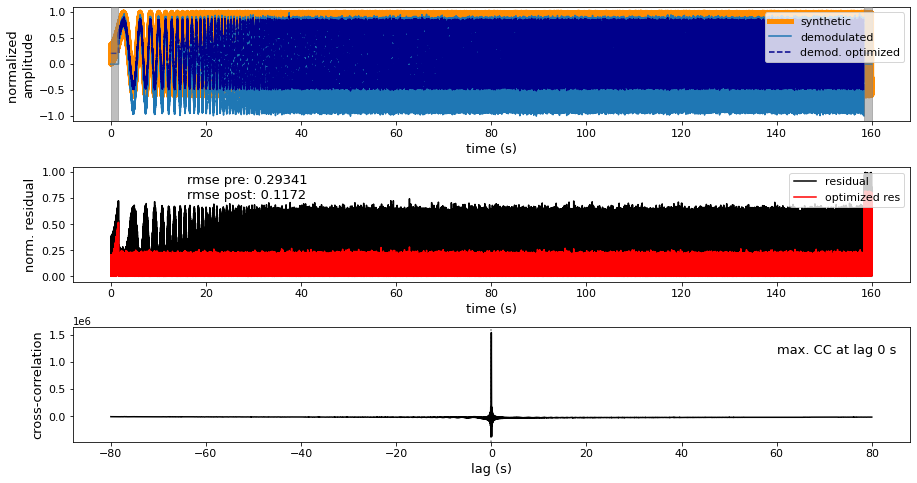

DONE
_______________________________
yes 0.853167852417


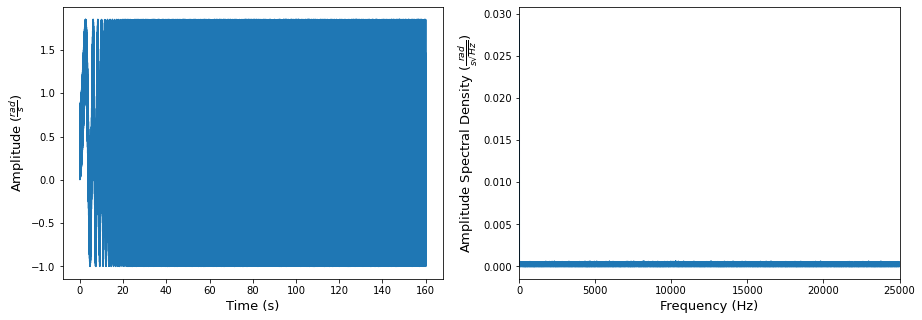


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.34 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1544493.091 at lag: 0

optimized: original -  0.745 * model + 0.241

cutoff: 8000 --> residual median: 0.00011111418065187784

optimized: original -  0.745 * model + 0.241

0.779864233253


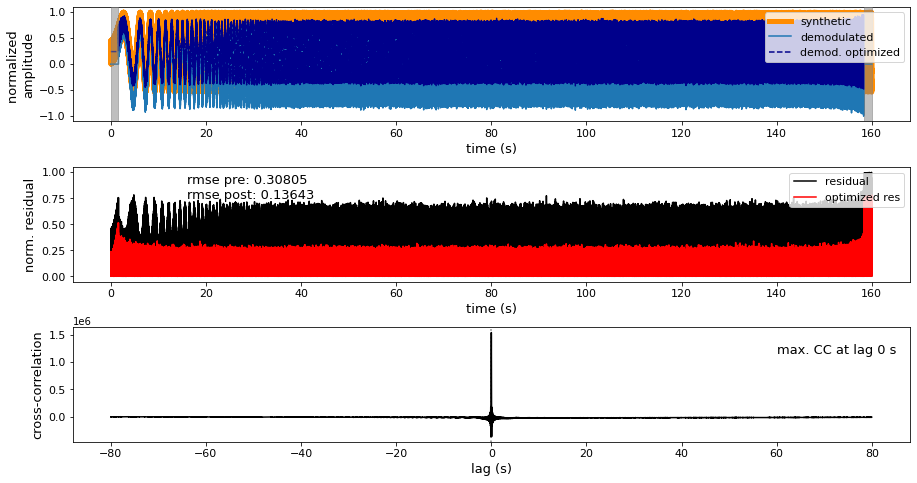

DONE
_______________________________
yes 1.17210229753


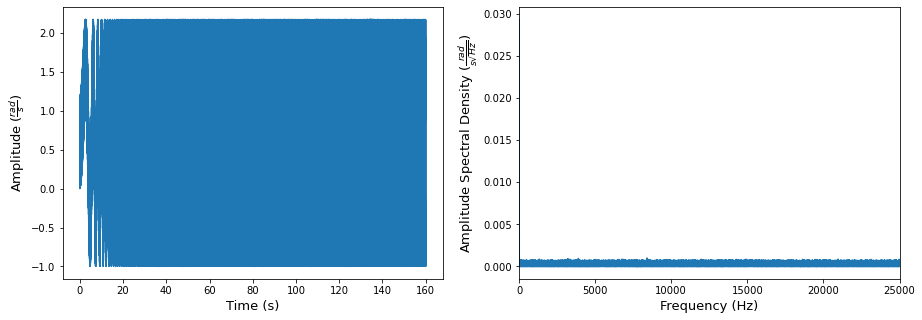


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.44 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1554397.865 at lag: 0

optimized: original -  0.812 * model + 0.278

cutoff: 8000 --> residual median: -3.857355784042671e-05

optimized: original -  0.812 * model + 0.278

0.735315701998


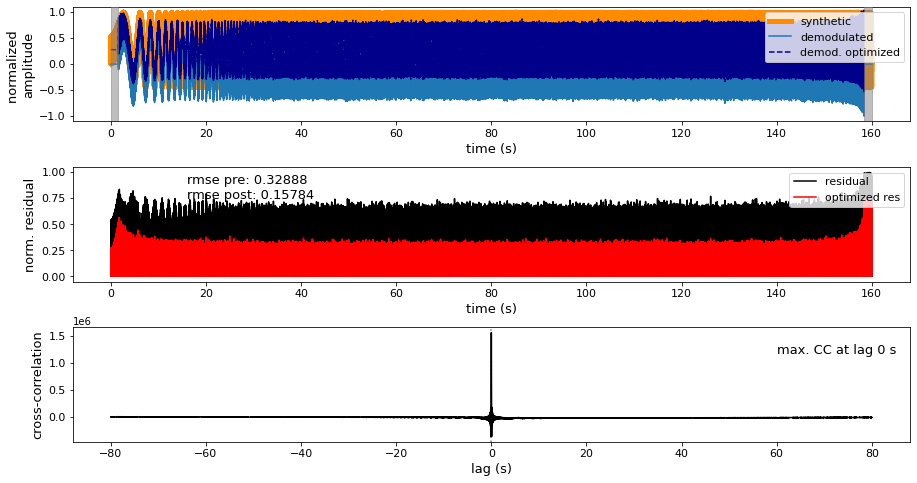

DONE
_______________________________
yes 1.61026202756


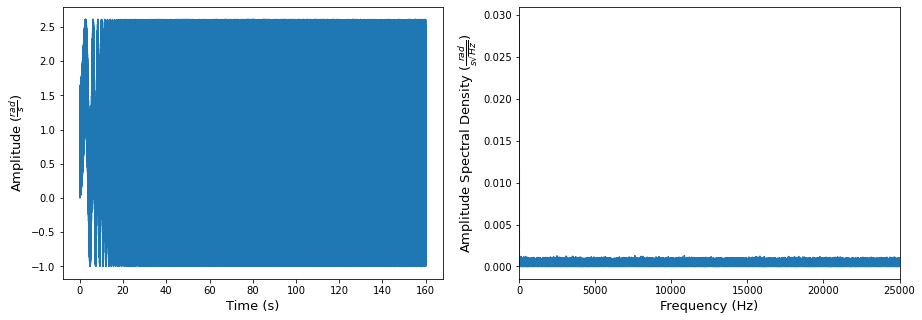


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.52 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1549962.494 at lag: 0

optimized: original -  0.553 * model + 0.317

cutoff: 8000 --> residual median: -9.105340209696056e-07

optimized: original -  0.553 * model + 0.317

0.697267657165


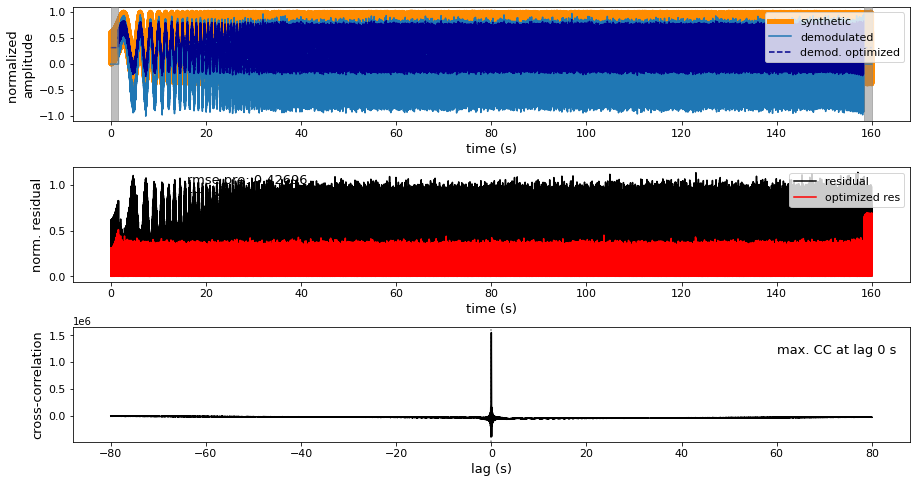

DONE
_______________________________
yes 2.21221629107


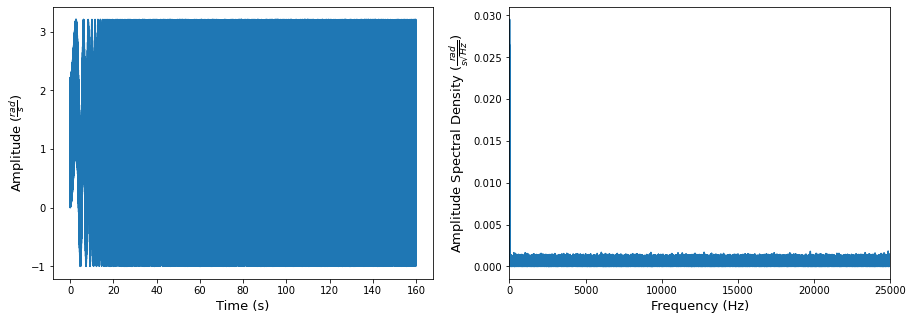


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.26 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1583973.953 at lag: 0

optimized: original -  0.539 * model + 0.35

cutoff: 8000 --> residual median: -5.9500347430384466e-05

optimized: original -  0.539 * model + 0.35

0.659970581831


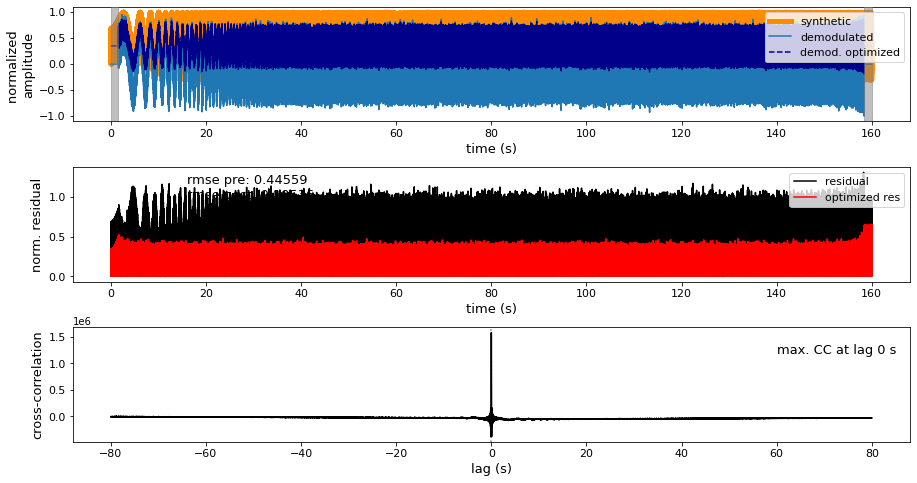

DONE
_______________________________
yes 3.03919538231


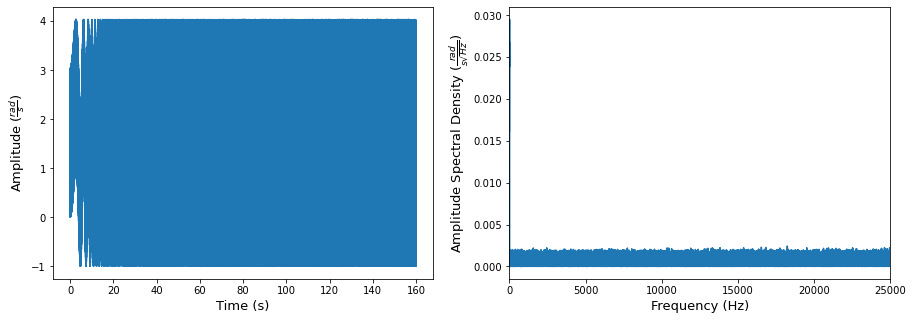


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.28 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1631295.668 at lag: 0

optimized: original -  0.484 * model + 0.381

cutoff: 8000 --> residual median: 0.00017665728104376832

optimized: original -  0.484 * model + 0.381

0.621897057581


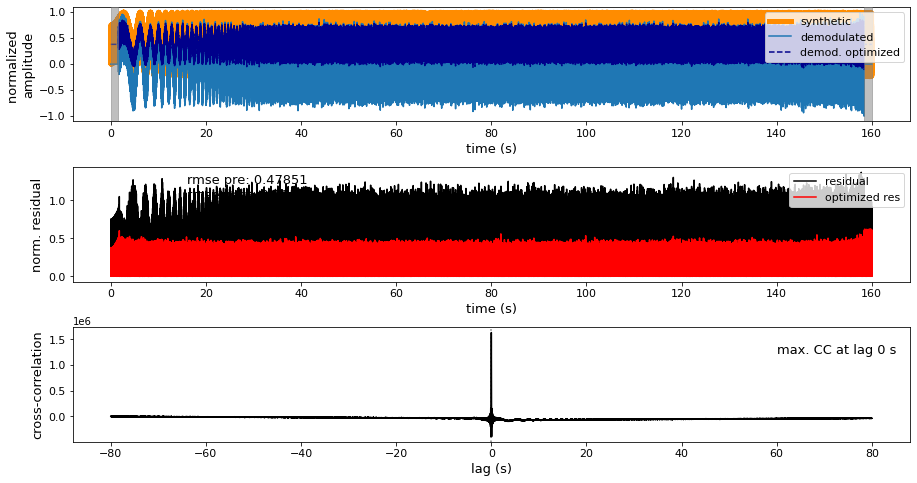

DONE
_______________________________
yes 4.17531893656


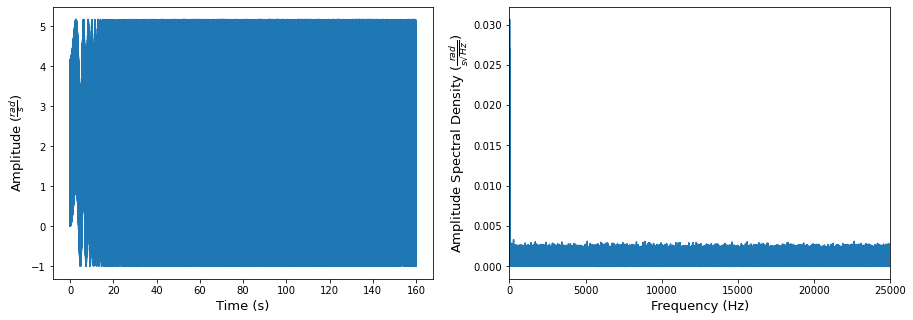


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.27 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1729795.836 at lag: 0

optimized: original -  0.436 * model + 0.406

cutoff: 8000 --> residual median: -0.00018385496400352697

optimized: original -  0.436 * model + 0.406

0.596451455896


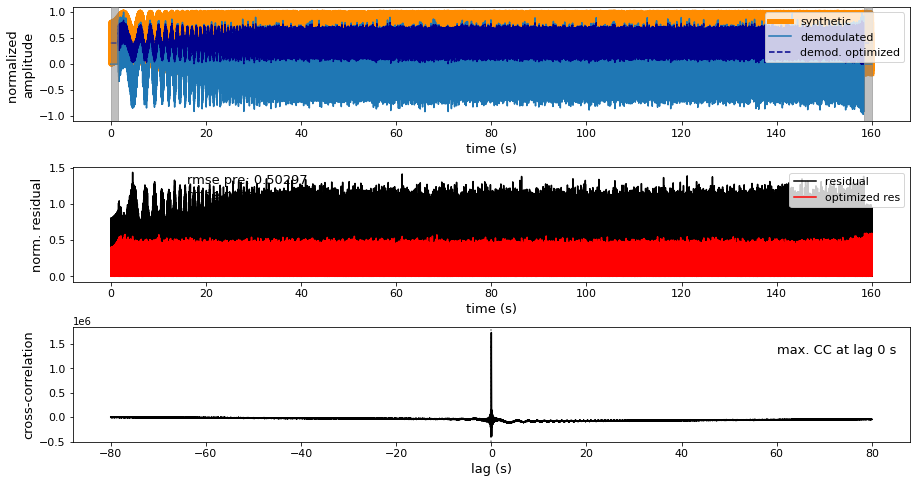

DONE
_______________________________
yes 5.73615251045


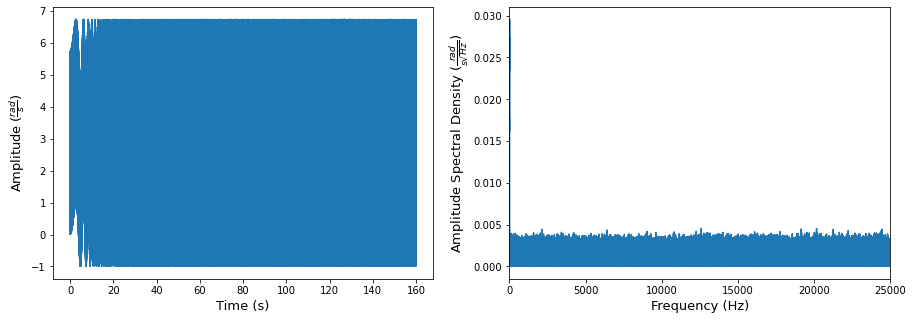


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.59 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 1891093.59 at lag: 0

optimized: original -  0.39 * model + 0.429

cutoff: 8000 --> residual median: -0.00012407844204492813

optimized: original -  0.39 * model + 0.429

0.621060094946


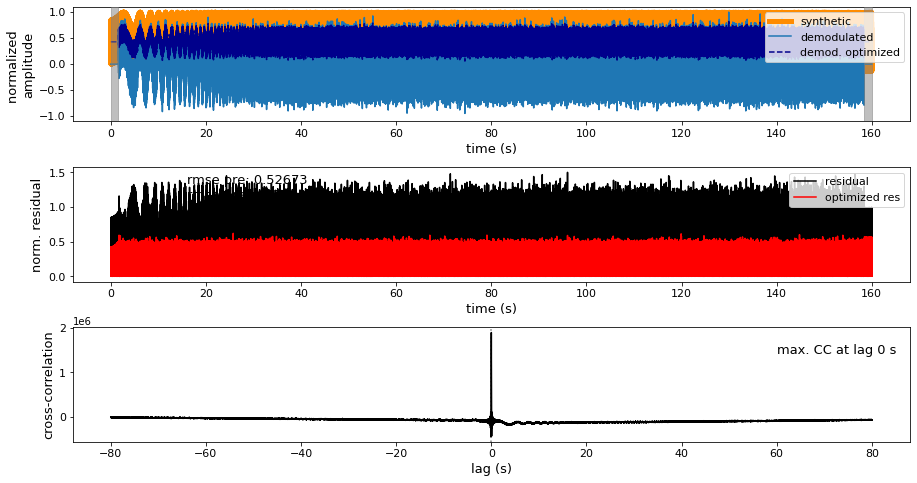

DONE
_______________________________
yes 7.88046281567


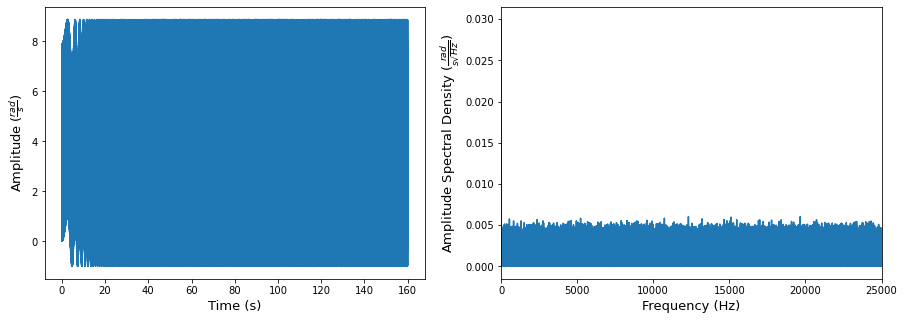


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.16 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 2274480.403 at lag: 0

optimized: original -  0.36 * model + 0.446

cutoff: 8000 --> residual median: -0.0006602500769712361

optimized: original -  0.36 * model + 0.446

0.613000597975


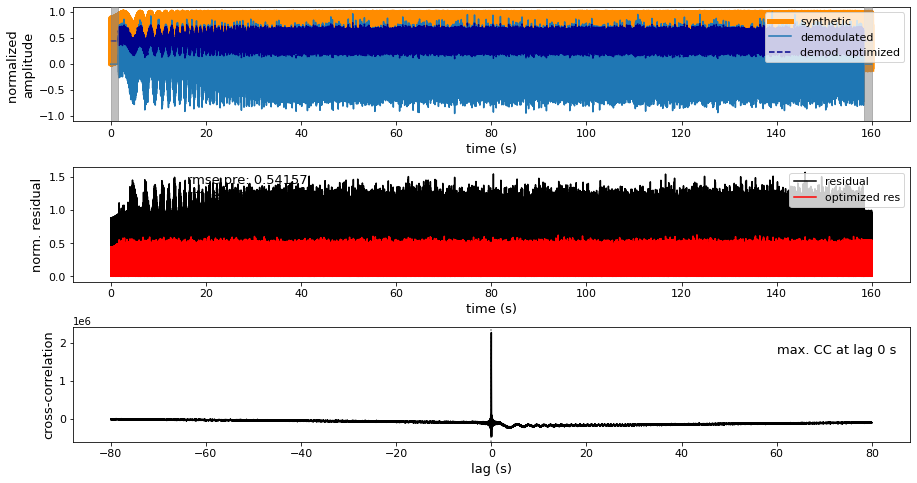

DONE
_______________________________
yes 10.8263673387


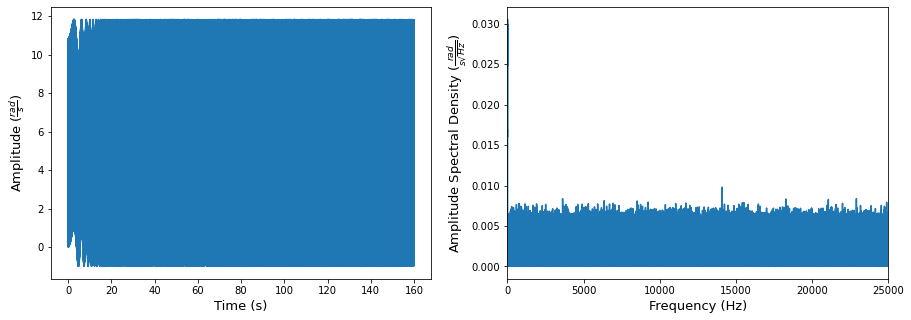


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.44 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 2983298.787 at lag: 0

optimized: original -  0.36 * model + 0.458

cutoff: 8000 --> residual median: 0.00031706353511384844

optimized: original -  0.36 * model + 0.458

0.667308408049


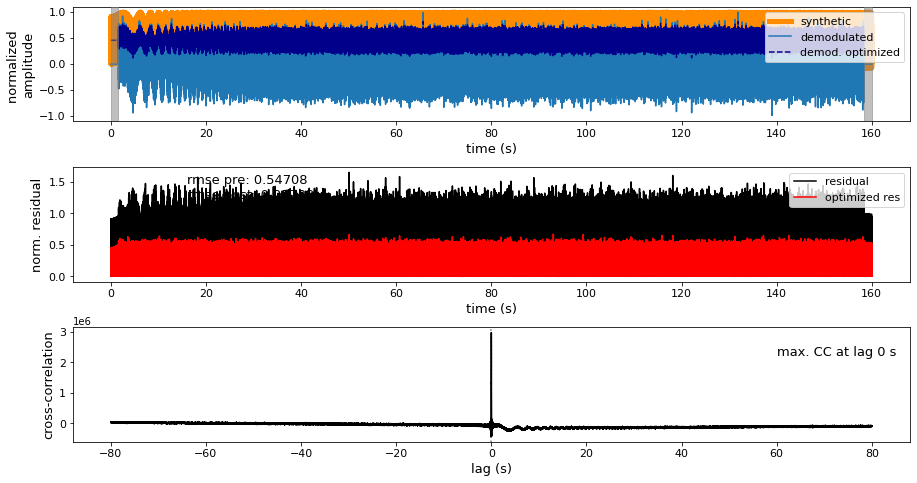

DONE
_______________________________
yes 14.8735210729


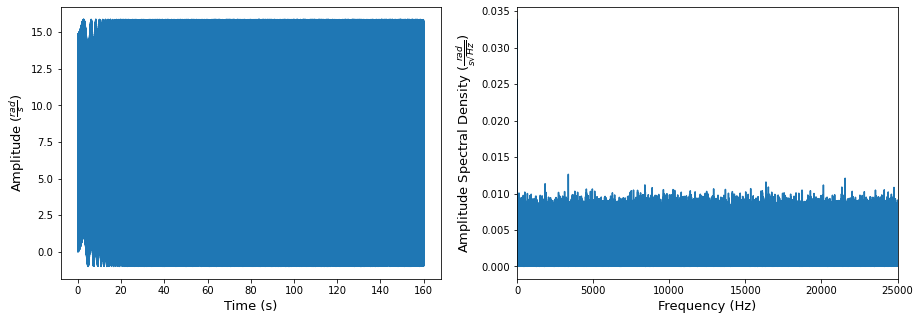


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.28 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 4311776.403 at lag: 0

optimized: original -  0.354 * model + 0.469

cutoff: 8000 --> residual median: 0.0003038770123476864

optimized: original -  0.354 * model + 0.469

0.692340269643


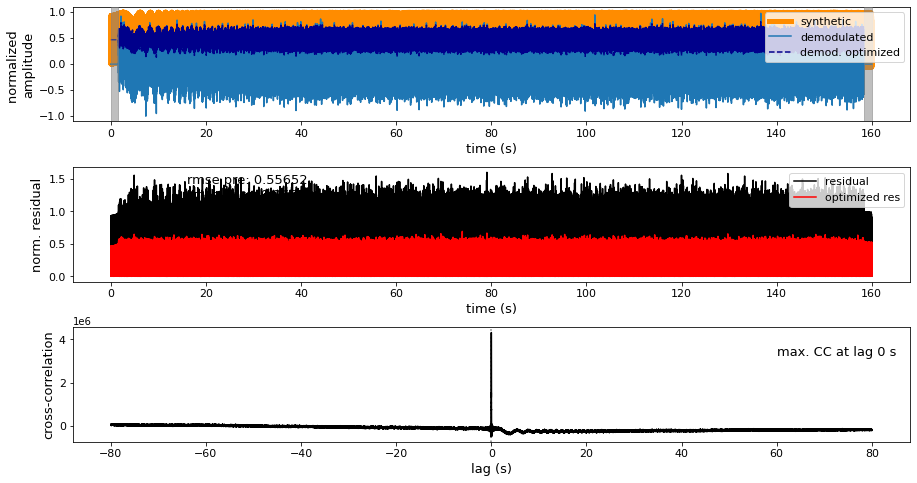

DONE
_______________________________
yes 20.4335971786


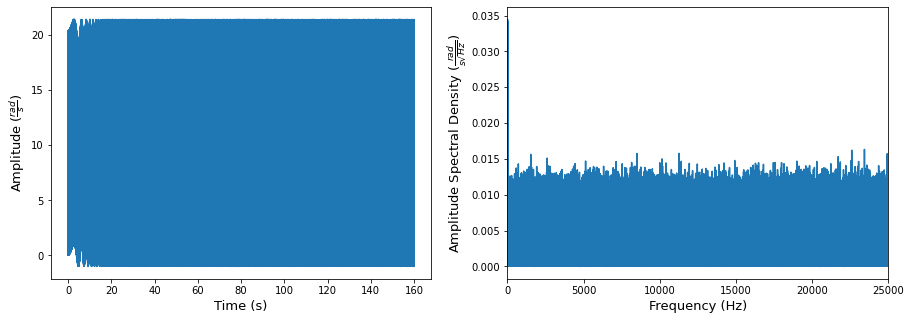


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.45 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 6874292.279 at lag: 0

optimized: original -  0.322 * model + 0.477

cutoff: 8000 --> residual median: -0.0002460130983824027

optimized: original -  0.322 * model + 0.477

0.678404021299


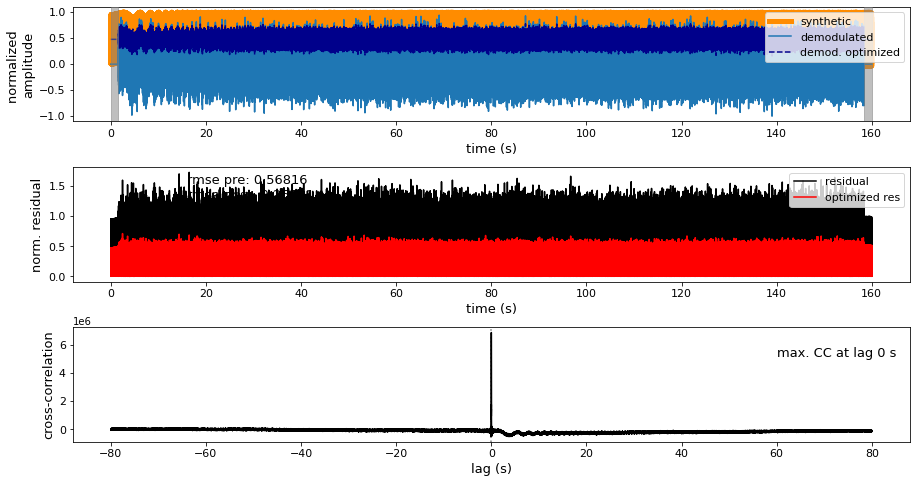

DONE
_______________________________
yes 28.0721620394


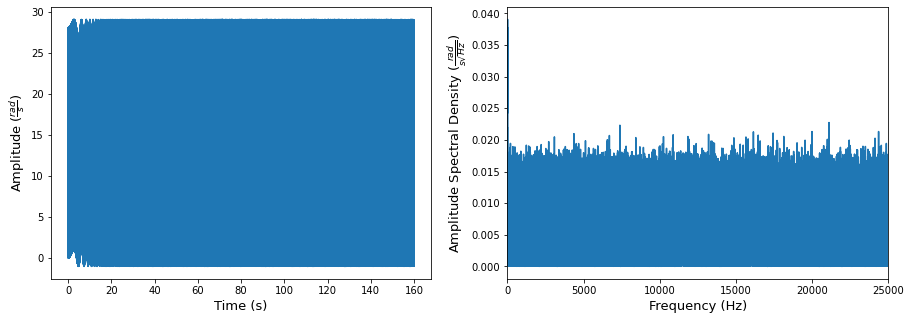


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.26 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 11701741.811 at lag: 0

optimized: original -  0.325 * model + 0.483

cutoff: 8000 --> residual median: -0.0001653610956134921

optimized: original -  0.325 * model + 0.483

0.704702373297


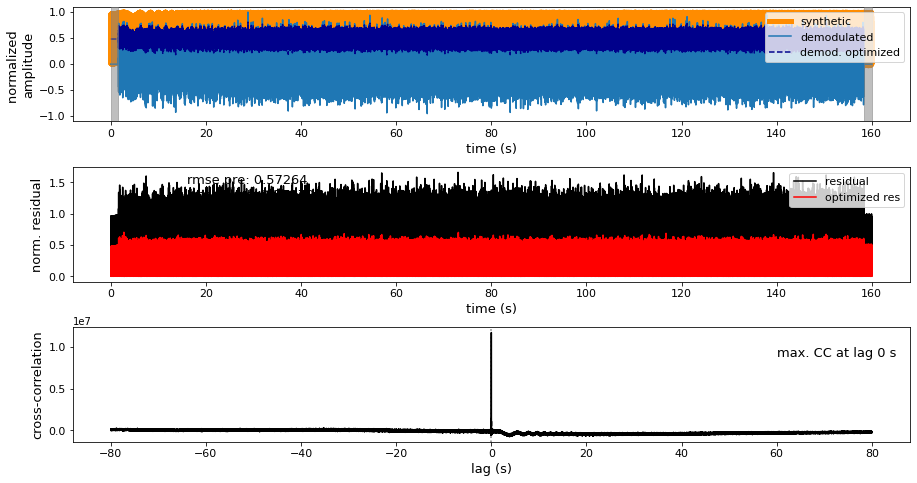

DONE
_______________________________
yes 38.5662042116


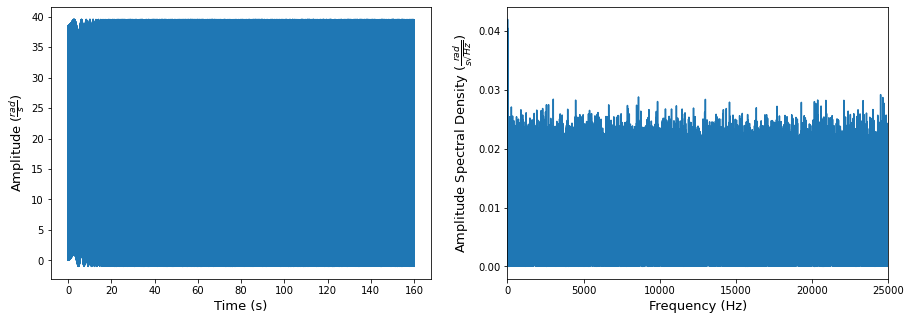


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.32 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 20484824.166 at lag: 0

optimized: original -  0.327 * model + 0.487

cutoff: 8000 --> residual median: 0.0003554431061288943

optimized: original -  0.327 * model + 0.487

0.707855457639


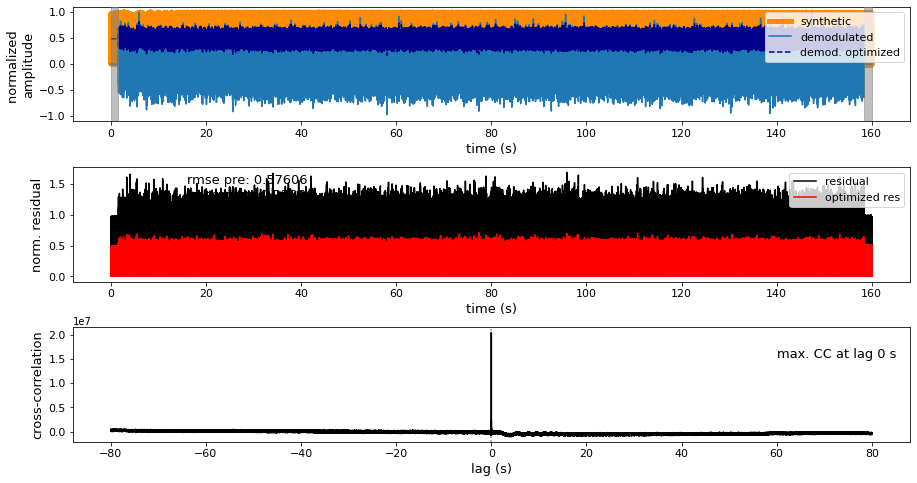

DONE
_______________________________
yes 52.9831690628


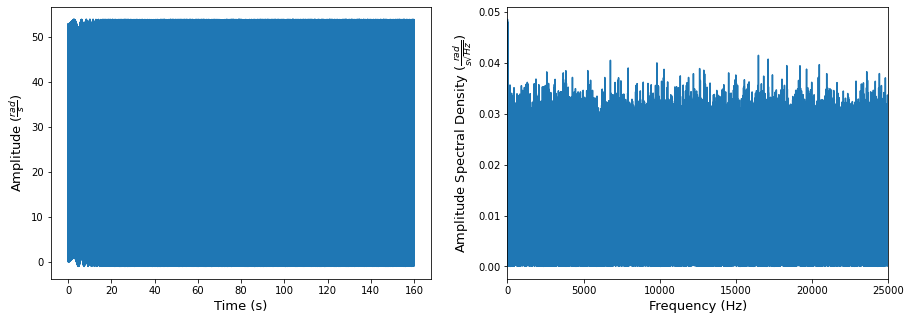


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.43 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 37129732.831 at lag: 0

optimized: original -  0.329 * model + 0.491

cutoff: 8000 --> residual median: 0.00016845046905367145

optimized: original -  0.329 * model + 0.491

0.78365734833


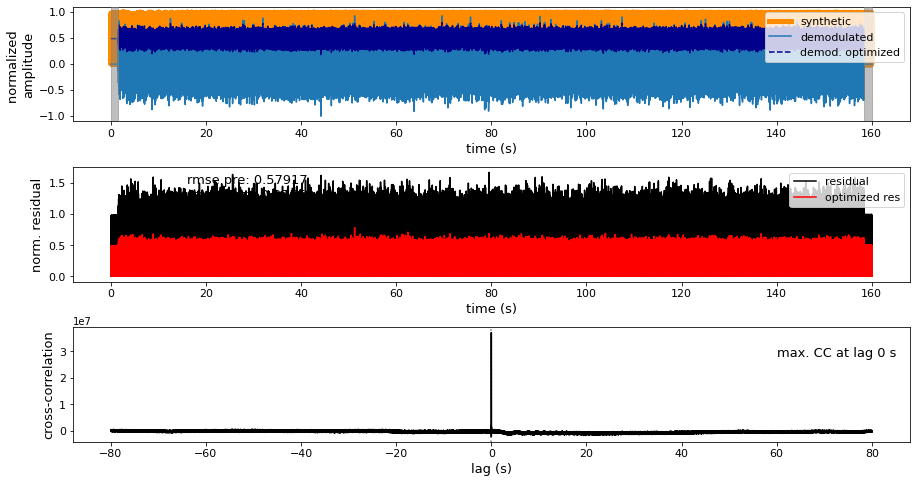

DONE
_______________________________
yes 72.7895384398


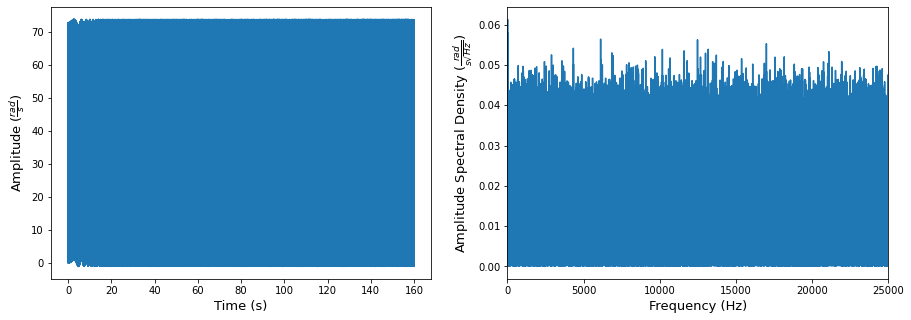


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.35 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 69703796.398 at lag: 0

optimized: original -  0.333 * model + 0.493

cutoff: 8000 --> residual median: 5.038198263074278e-05

optimized: original -  0.333 * model + 0.493

0.71664593564


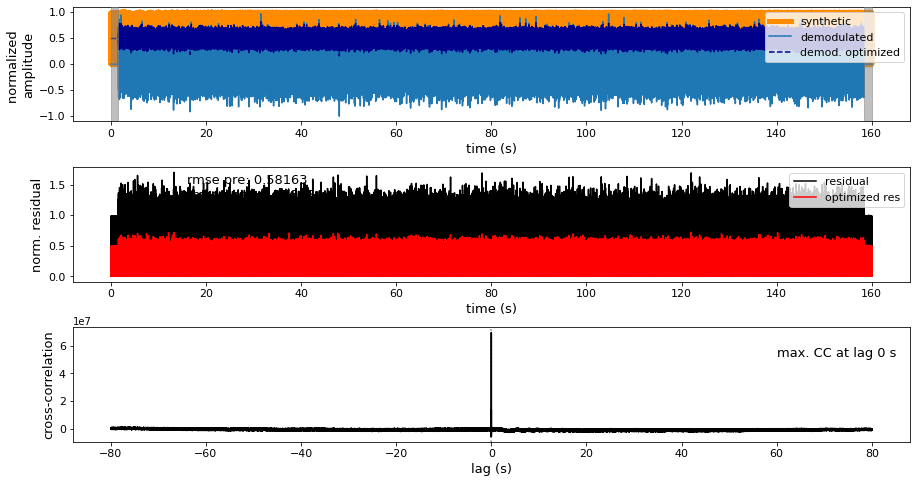

DONE
_______________________________
yes 100.0


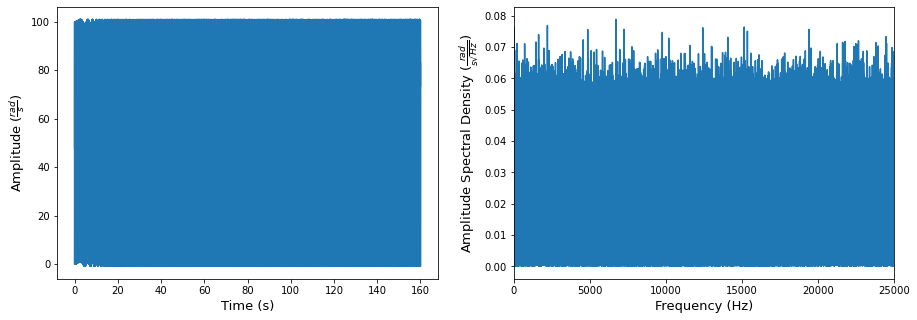


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 4.33 sec
1 nan removed !

 max lag CC: 400000 
 min lag CC: -400000

 maximal CC: 128276301.161 at lag: 0

optimized: original -  0.32 * model + 0.495

cutoff: 8000 --> residual median: -5.885577747388737e-05

optimized: original -  0.32 * model + 0.495

0.716450560365


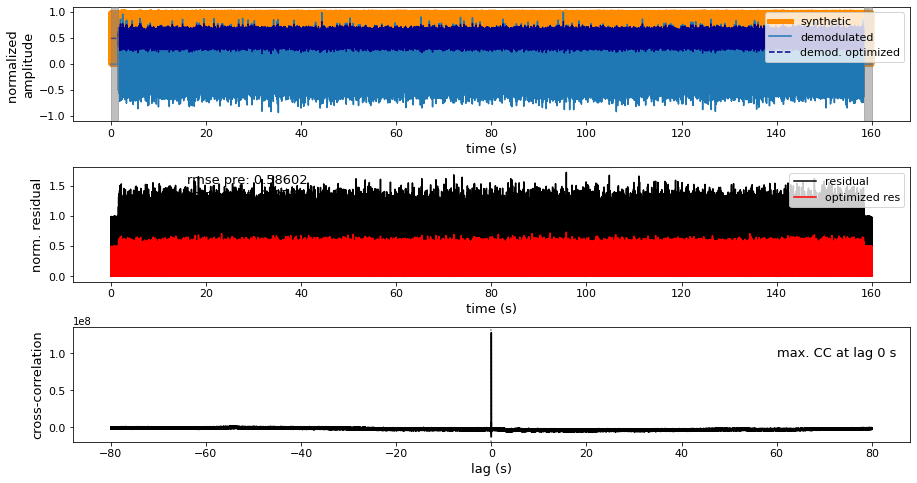

DONE
_______________________________


In [17]:
ccs, cclags, rms_pres, rms_posts, rmss = [], [], [], [], []


for noise in noises: 
    
    cc, cclag, rms_pre, rms_post, rms = __run_sagnac_processing(   sgnc, 
                                                                   T, 
                                                                   sps, 
                                                                   oversampling,
                                                                   modulation_index,
                                                                   f_lower, 
                                                                   f_upper, 
                                                                   syn_signal,
                                                                   taper_type, 
                                                                   taper_percent=0.2,
                                                                   noise_level = noise,
                                                                )

    ccs.append(cc)
    cclags.append(cclag)
    rms_pres.append(rms_pre)
    rms_posts.append(rms_post)
    rmss.append(rms)
    

In [18]:

def __makeplot_quality_quantity_noise(xaxis, ccs, cclags, rms_pres, rms_posts, rmss):

    fig, ax = plt.subplots(2,2, figsize=(15,10))

    font = 12
    
    ## ________________________________________

    ax[0,0].plot(xaxis, ccs, color='k', ls='-', label='max. CC')
    ax[0,0].scatter(xaxis, ccs, color='k', s=10)

    ax[0,0].grid(alpha=0.5, ls='--')

    ax[0,0].legend()
    ax[0,0].set_xlabel("whitening factor", fontsize=font)
    ax[0,0].set_xscale("log")
    
    ## ________________________________________

    ax[0,1].plot(xaxis, cclags, color='k', ls='-', label='lag of max. CC')
    ax[0,1].scatter(xaxis, cclags, color='k', s=10)

    ax[0,1].grid(alpha=0.5, ls='--')

    ax[0,1].legend()
    ax[0,1].set_xlabel("whitening factor", fontsize=font)
    ax[0,1].set_xscale("log")

    ## ________________________________________

    ax[1,0].plot(xaxis, rms_pres, color='darkblue', ls='-', label='rmse norm.')
    ax[1,0].scatter(xaxis, rms_pres, color='blue', s=10)

    ax[1,0].plot(xaxis, rms_posts, color='darkred', ls='-', label='rmse norm. opt.')
    ax[1,0].scatter(xaxis, rms_posts, color='red', s=10)

    ax[1,0].grid(alpha=0.5, ls='--')

    ax[1,0].legend()
    ax[1,0].set_xlabel("whitening factor", fontsize=font)
    ax[1,0].set_xscale("log")

    ## ________________________________________

    ax[1,1].plot(xaxis, rmss, color='darkgreen', ls='-', label='rmse total')
    ax[1,1].scatter(xaxis, rmss, color='green', s=10)

    ax[1,1].grid(alpha=0.5, ls='--')

    ax[1,1].legend()
    ax[1,1].set_xlabel("whitening factor", fontsize=font)
    ax[1,1].set_xscale("log")
    
    plt.show();
    
    return fig


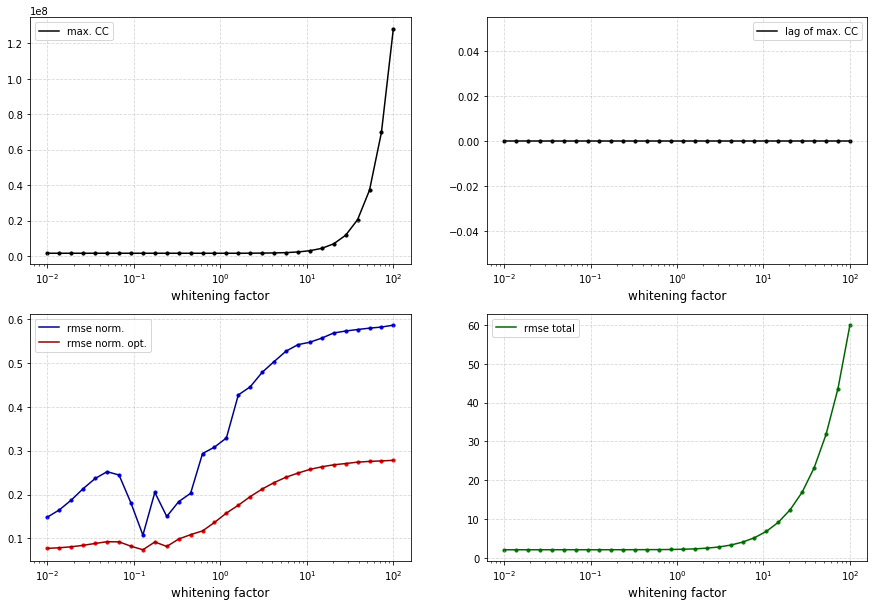

In [19]:

fig = __makeplot_quality_quantity_noise(noises, ccs, cclags, rms_pres, rms_posts, rmss)

fig.savefig(f"plots/test_noise_{syn_signal}_{noises[0]}-{noises[-1]}_T{int(T)}_fs{int(sps)}__S{int(sgnc)}_f{f_lower}-{f_upper}_mi{modulation_index}.pdf", dpi=300, format='pdf')
